# Eye State Prediction Using EEG
<br>
<br>

####  In this project, we will investigate how the eye state (open or closed) can be predicted by measuring brain waves with an EEG.

* About the dataset : The dataset was originally developed and used in a research paper named <u> 'A First Step towards Eye State Prediction Using EEG' </u> by <u>Oliver R osler and David Suendermann</u>.

<br>

* Specifically, an electroencephalography (EEG) recording was made of a single person for 117 seconds (just under two minutes) while the subject opened and closed their eyes, which was recorded via a video camera. The open/closed state was then recorded against each time step in the EEG trace manually.

<br>

* The data was collected as data from 14 probes of a the activationstrength of the fourteen electrodes of a commercial EEG headsetas well as the manually annotated eye state corresponding to the recorded data.

<img src='ecg_eye.png' width='300px'>

### Objective : 
<ol>
    <li>Explore the data by performing exploratory data analysis. </li>
    
   <li>Build a Machine Learning model to predict the state of eye from ECG data </li>
</ol>

<img src='brain-waves-and-pain-illustration.jpg' width='600px'>

* ### importing the essential libraries

In [1]:
import numpy as np

from scipy.io import arff
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

* ### Importing and loading the dataset

In [2]:
# Reading the data from arff file

data = arff.loadarff('EEGEyeState.arff')

In [3]:
# Converting the data stored in tuple to a pandas Dataframe

ecg = pd.DataFrame(data = data[0])

In [4]:
# Checking the head of the dataset

ecg.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [5]:
# Information of the dataset

ecg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
AF3             14980 non-null float64
F7              14980 non-null float64
F3              14980 non-null float64
FC5             14980 non-null float64
T7              14980 non-null float64
P7              14980 non-null float64
O1              14980 non-null float64
O2              14980 non-null float64
P8              14980 non-null float64
T8              14980 non-null float64
FC6             14980 non-null float64
F4              14980 non-null float64
F8              14980 non-null float64
AF4             14980 non-null float64
eyeDetection    14980 non-null object
dtypes: float64(14), object(1)
memory usage: 1.7+ MB


In [6]:
# Statistical description of the dataset

ecg.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000


In [7]:
# Let us check our output format

a = ecg['eyeDetection'].unique()

a

array([b'0', b'1'], dtype=object)

In [8]:
print(type(a[0]))

<class 'bytes'>


we can see that the data is given in 'bytes' format. we will convert it into 'integer'.

In [9]:
# Converting output feature from 'bytes' to 'integer'

ecg['eyeDetection'] = ecg['eyeDetection'].apply(lambda x : int(x))

In [10]:
# Checking the head of the dataset

ecg.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


* ### Exploratory Data Analysis

In [11]:
# Setting the plotting style of seaborn plots

sns.set_style( style = 'whitegrid')

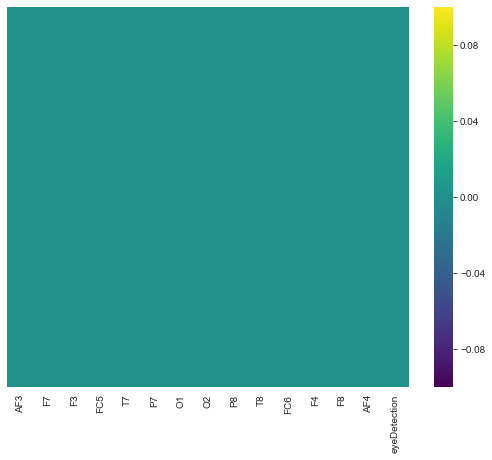

In [12]:
#checking if there is any null values present in the sataset

plt.figure( figsize = (9, 7))

sns.heatmap( data = ecg.isnull() , yticklabels = False , cmap = 'viridis')

(15.0, 0.0)

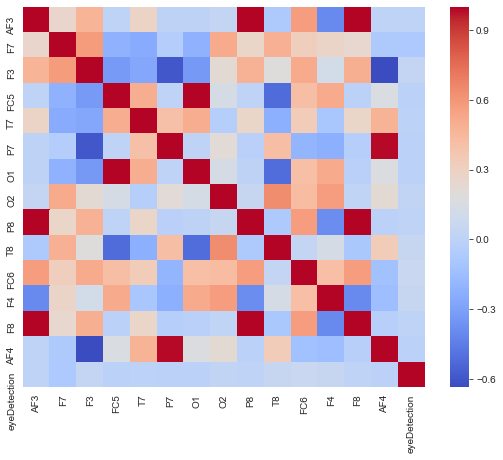

In [13]:
# Calculating the correlation matrix or similarity matrix

plt.figure( figsize = (9, 7))

ax = sns.heatmap( data = ecg.corr() ,  cmap = 'coolwarm')

top , bottom = ax.get_ylim()

ax.set_ylim(top+0.5 , bottom-0.5)

In [14]:
# Correlation matrix of the dataset

ecg.corr()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
AF3,1.000000,0.261146,0.474569,0.012173,0.278938,0.007958,0.006630,0.040539,0.999607,-0.070801,0.572997,-0.394334,0.998714,0.012070,0.010458
F7,0.261146,1.000000,0.583317,-0.208922,-0.250816,-0.042288,-0.210591,0.517816,0.264922,0.489010,0.317418,0.275977,0.251327,-0.071895,-0.079994
F3,0.474569,0.583317,1.000000,-0.330162,-0.272186,-0.596566,-0.335514,0.221270,0.486506,0.191273,0.517950,0.116761,0.500276,-0.637363,0.038902
FC5,0.012173,-0.208922,-0.330162,1.000000,0.504616,0.009049,0.999961,0.130482,0.013228,-0.519498,0.420311,0.515388,-0.005351,0.161155,-0.007531
T7,0.278938,-0.250816,-0.272186,0.504616,1.000000,0.409277,0.504231,-0.030063,0.264913,-0.225508,0.336173,-0.095902,0.267107,0.478852,-0.000369
P7,0.007958,-0.042288,-0.596566,0.009049,0.409277,1.000000,0.013707,0.208167,-0.012528,0.420539,-0.196873,-0.229149,-0.030921,0.988310,-0.007845
O1,0.006630,-0.210591,-0.335514,0.999961,0.504231,0.013707,1.000000,0.133434,0.007638,-0.515699,0.417041,0.517621,-0.011080,0.165730,-0.007223
O2,0.040539,0.517816,0.221270,0.130482,-0.030063,0.208167,0.133434,1.000000,0.047843,0.640387,0.433333,0.577013,0.020493,0.224627,0.025100
P8,0.999607,0.264922,0.486506,0.013228,0.264913,-0.012528,0.007638,0.047843,1.000000,-0.074047,0.577472,-0.385643,0.998849,-0.008055,0.009576
T8,-0.070801,0.489010,0.191273,-0.519498,-0.225508,0.420539,-0.515699,0.640387,-0.074047,1.000000,0.038252,0.132692,-0.082256,0.336282,0.047218


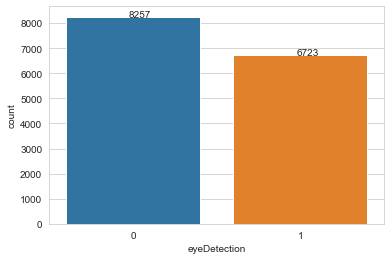

In [15]:
# Checking number of observations for each class.

ax = sns.countplot(ecg["eyeDetection"], 
                   order = ecg["eyeDetection"].value_counts().index)

for p, label in zip(ax.patches, ecg["eyeDetection"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

# So the dataset is fairly balanced

In [16]:
# Exploring the features of the dataset

In [17]:
ecg.columns

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'eyeDetection'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

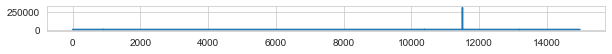

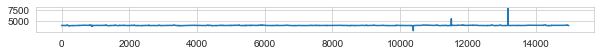

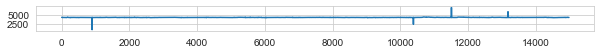

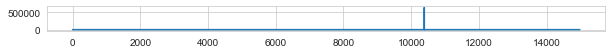

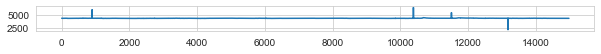

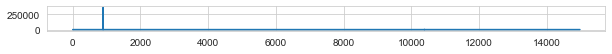

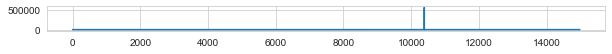

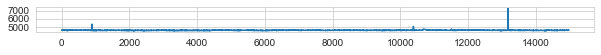

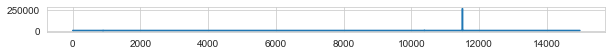

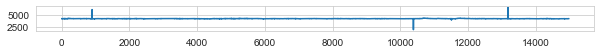

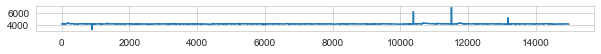

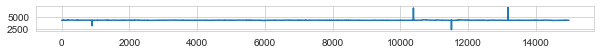

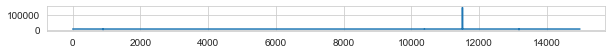

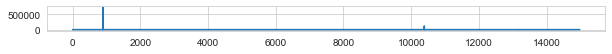

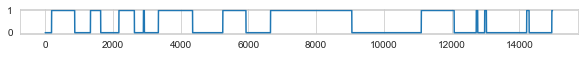

In [18]:

values = ecg.values
# create a subplot for each time series
plt.figure()
for i in range(values.shape[1]):
    plt.figure(figsize=(10,8))
    plt.subplot(values.shape[1], 1, i+1)
    plt.plot(values[:, i])
plt.show()

* So here we can see that there are some outliers present in the dataste. We will remove these data points from our dataset.

In [19]:
ecg_f = ecg.copy()

previous_shape = ecg_f.shape
for col in ecg_f.columns[:-1] :
    
    mean = ecg_f[col].mean()
    
    std= ecg_f[col].std()
    
    minimum , maximum = mean - 4*std , mean + 4*std
    
    ecg_f = ecg_f[(ecg_f[col]>minimum) & (ecg_f[col]<maximum)]
    
    current_shape = ecg_f.shape
    
    change = previous_shape[0]-current_shape[0]
    if current_shape != previous_shape :
        print(f'Outliers were present in the column " {col} " dropped {change} row')

print("\n The dataset is free of outliers now.")

Outliers were present in the column " AF3 " dropped 1 row
Outliers were present in the column " F7 " dropped 4 row
Outliers were present in the column " F3 " dropped 146 row
Outliers were present in the column " FC5 " dropped 194 row
Outliers were present in the column " T7 " dropped 347 row
Outliers were present in the column " P7 " dropped 390 row
Outliers were present in the column " O1 " dropped 390 row
Outliers were present in the column " O2 " dropped 405 row
Outliers were present in the column " P8 " dropped 410 row
Outliers were present in the column " T8 " dropped 420 row
Outliers were present in the column " FC6 " dropped 494 row
Outliers were present in the column " F4 " dropped 506 row
Outliers were present in the column " F8 " dropped 617 row
Outliers were present in the column " AF4 " dropped 676 row

 The dataset is free of outliers now.


* We have successfully dropped all the outliers

<Figure size 432x288 with 0 Axes>

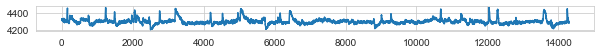

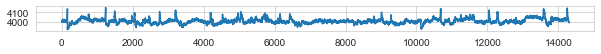

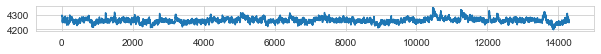

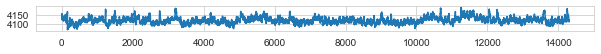

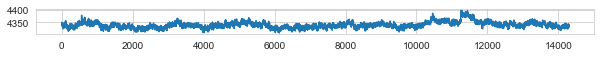

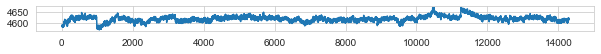

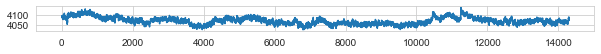

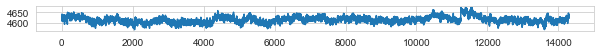

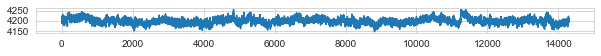

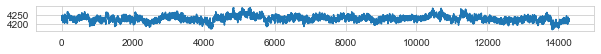

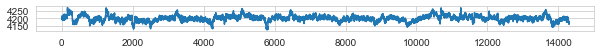

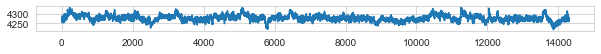

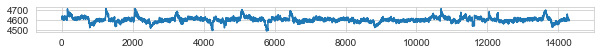

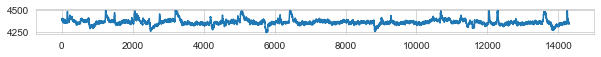

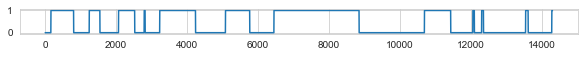

In [20]:

values = ecg_f.values
# create a subplot for each time series
plt.figure()
for i in range(values.shape[1]):
    plt.figure(figsize=(10,8))
    plt.subplot(values.shape[1], 1, i+1)
    plt.plot(values[:, i])
plt.show()

* From the above plot we can see that all the outliers are now removed.

 * ### Data preprocessing stage

In [21]:
# Splitting the data into independent and dependent variable set

X = ecg_f.iloc[:,:-1].values

y = ecg_f.iloc[:,-1].values

In [22]:
# Splitting the data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* ### Performing feature Scaling or column standardization.

In [23]:
# Performing feature Scaling or column standardization.

from sklearn.preprocessing import StandardScaler

scale_x = StandardScaler()

X_train = scale_x.fit_transform(X_train)

X_test = scale_x.transform(X_test)

In [24]:
scale_x1 = StandardScaler()

X_total = scale_x1.fit_transform(X)

* ### Building a Machine Learning model

* We perfomed some experiments and found that RandomForest algorithm is suitable for this task.

### GridSearch to find best hyperparameters

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [26]:
param_dict={'n_estimators':[50,100,150,200],'min_samples_split':[2,3,4],'verbose':[0,1],
           'criterion':['gini' , 'entropy']}

clf=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=param_dict,cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

clf.fit(X_total,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    5.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200],
                         'verbose': [0, 1]},
             scoring='neg_mean_squared_error')

In [27]:
print(clf.best_params_)

{'criterion': 'entropy', 'min_samples_split': 4, 'n_estimators': 150, 'verbose': 1}


### Building the actual model based on the found hyper-parameters

In [28]:
# Building a model

from sklearn.ensemble import RandomForestClassifier

In [29]:
model1 = RandomForestClassifier(n_estimators = 100 , criterion='entropy',
                               min_samples_split=3 , verbose= 0)

In [30]:
model1.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=3)

In [31]:
y_pred = model1.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
confusion_matrix(y_test,y_pred)

array([[1454,   64],
       [ 145, 1198]], dtype=int64)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1518
           1       0.95      0.89      0.92      1343

    accuracy                           0.93      2861
   macro avg       0.93      0.92      0.93      2861
weighted avg       0.93      0.93      0.93      2861



## So here we can conclude that our model is performing very well.

# Thank you.